In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [8]:
save_dir = "/cluster/home/kamara/conceptx"

dataset = "sentiment"
model_name = "llama-3-3b"
seed_ = 0

In [9]:
folder_path = os.path.join(save_dir, f"results/faithfulness/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
df_all


parts:  ['faithfulness', 'batch', '0', 'sentiment', 'llama-3-3b', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/sentiment/random/seed_0/faithfulness_batch_0_sentiment_llama-3-3b_random_0.csv
parts:  ['faithfulness', 'batch', '1', 'sentiment', 'llama-3-3b', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/sentiment/random/seed_0/faithfulness_batch_1_sentiment_llama-3-3b_random_0.csv
parts:  ['faithfulness', 'batch', '0', 'sentiment', 'llama-3-3b', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/sentiment/tokenshap/seed_0/faithfulness_batch_0_sentiment_llama-3-3b_tokenshap_0.csv
parts:  ['faithfulness', 'batch', '1', 'sentiment', 'llama-3-3b', 'tokenshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/llama-3-3b/sentiment/tokenshap/seed_0/faithfulness_batch_1_sentiment_llama-3-3b_tokenshap_0.csv
parts:  ['faithfulness', 'batch', 

,id,input,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,dataset,model,explainer,baseline,seed
0,4,That sucks to hear. I hate days like that,0.095270,0.180581,0.147553,0.104273,0.132853,0.044233,0.151244,0.068836,0.085805,0.271220,0.242103,sentiment,llama-3-3b,random,None,0
1,8,Is sad when people`s phones are dead,0.329718,0.054266,0.412861,0.315485,0.290773,0.214264,0.215940,0.109258,0.299490,0.154103,0.331160,sentiment,llama-3-3b,random,None,0
2,22,gonna have a lazy day today,0.186408,0.255398,0.241737,0.060462,0.152048,0.139922,0.160220,0.157161,0.153132,0.022632,0.157161,sentiment,llama-3-3b,random,None,0
3,24,http://twitpic.com/3ernb - Loving The Jumper,0.241561,0.192991,0.175883,0.078482,0.096326,0.235533,0.240740,0.106230,0.394825,0.087444,0.279644,sentiment,llama-3-3b,random,None,0
4,31,LUCY IS HATING ON MY GWEG!,0.341418,0.390158,0.220123,0.325413,0.294565,0.366768,0.201948,0.251129,0.448082,0.090221,0.246564,sentiment,llama-3-3b,random,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,553,have a lok at EF too they are jummy,0.572810,0.368774,0.427647,0.311006,0.361921,0.757697,0.451597,0.003874,0.225696,0.226200,0.381843,sentiment,llama-3-3b,conceptshap,None,0
582,563,Bad day just got worse,0.143043,0.054138,0.120052,0.092701,0.117284,0.087946,0.069768,0.110810,0.084844,0.271494,0.038821,sentiment,llama-3-3b,conceptshap,None,0
583,564,em app ra bai ardham ai sasthaledhu,0.230266,0.391751,0.246032,0.546604,0.083392,0.579105,0.270906,0.230548,0.106412,0.568377,0.466073,sentiment,llama-3-3b,conceptshap,None,0
584,567,Hmmm My whole body feels sore,0.018610,0.061882,0.190777,0.513347,-0.029078,0.448581,0.401624,0.492115,0.489203,0.197681,0.470809,sentiment,llama-3-3b,conceptshap,None,0


In [10]:
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "concept": "_c"}).fillna("")

In [11]:
explainer_map = {'conceptshap': 'ConceptX', 'conceptshap_r': 'ConceptX-R', 'conceptshap_c': 'ConceptX-C', 'conceptshap': 'ConceptX', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptX", "ConceptX-R", "ConceptX-C"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptX": pal[9], "ConceptX-R": pal[4],
    "ConceptX-C": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptX", "ConceptX-R", "ConceptX-C"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptX"]


Empty DataFrame
Columns: [id, input, sim_0.0, sim_0.1, sim_0.2, sim_0.3, sim_0.4, sim_0.5, sim_0.6, sim_0.7, sim_0.8, sim_0.9, sim_1.0, dataset, model, explainer, baseline, seed]
Index: []
      id                                          input   sim_0.0   sim_0.1  \
0      4      That sucks to hear. I hate days like that  0.095270  0.180581   
1      8           Is sad when people`s phones are dead  0.329718  0.054266   
2     22                    gonna have a lazy day today  0.186408  0.255398   
3     24   http://twitpic.com/3ernb - Loving The Jumper  0.241561  0.192991   
4     31                     LUCY IS HATING ON MY GWEG!  0.341418  0.390158   
..   ...                                            ...       ...       ...   
581  553            have a lok at EF too they are jummy  0.572810  0.368774   
582  563                         Bad day just got worse  0.143043  0.054138   
583  564            em app ra bai ardham ai sasthaledhu  0.230266  0.391751   
584  567             

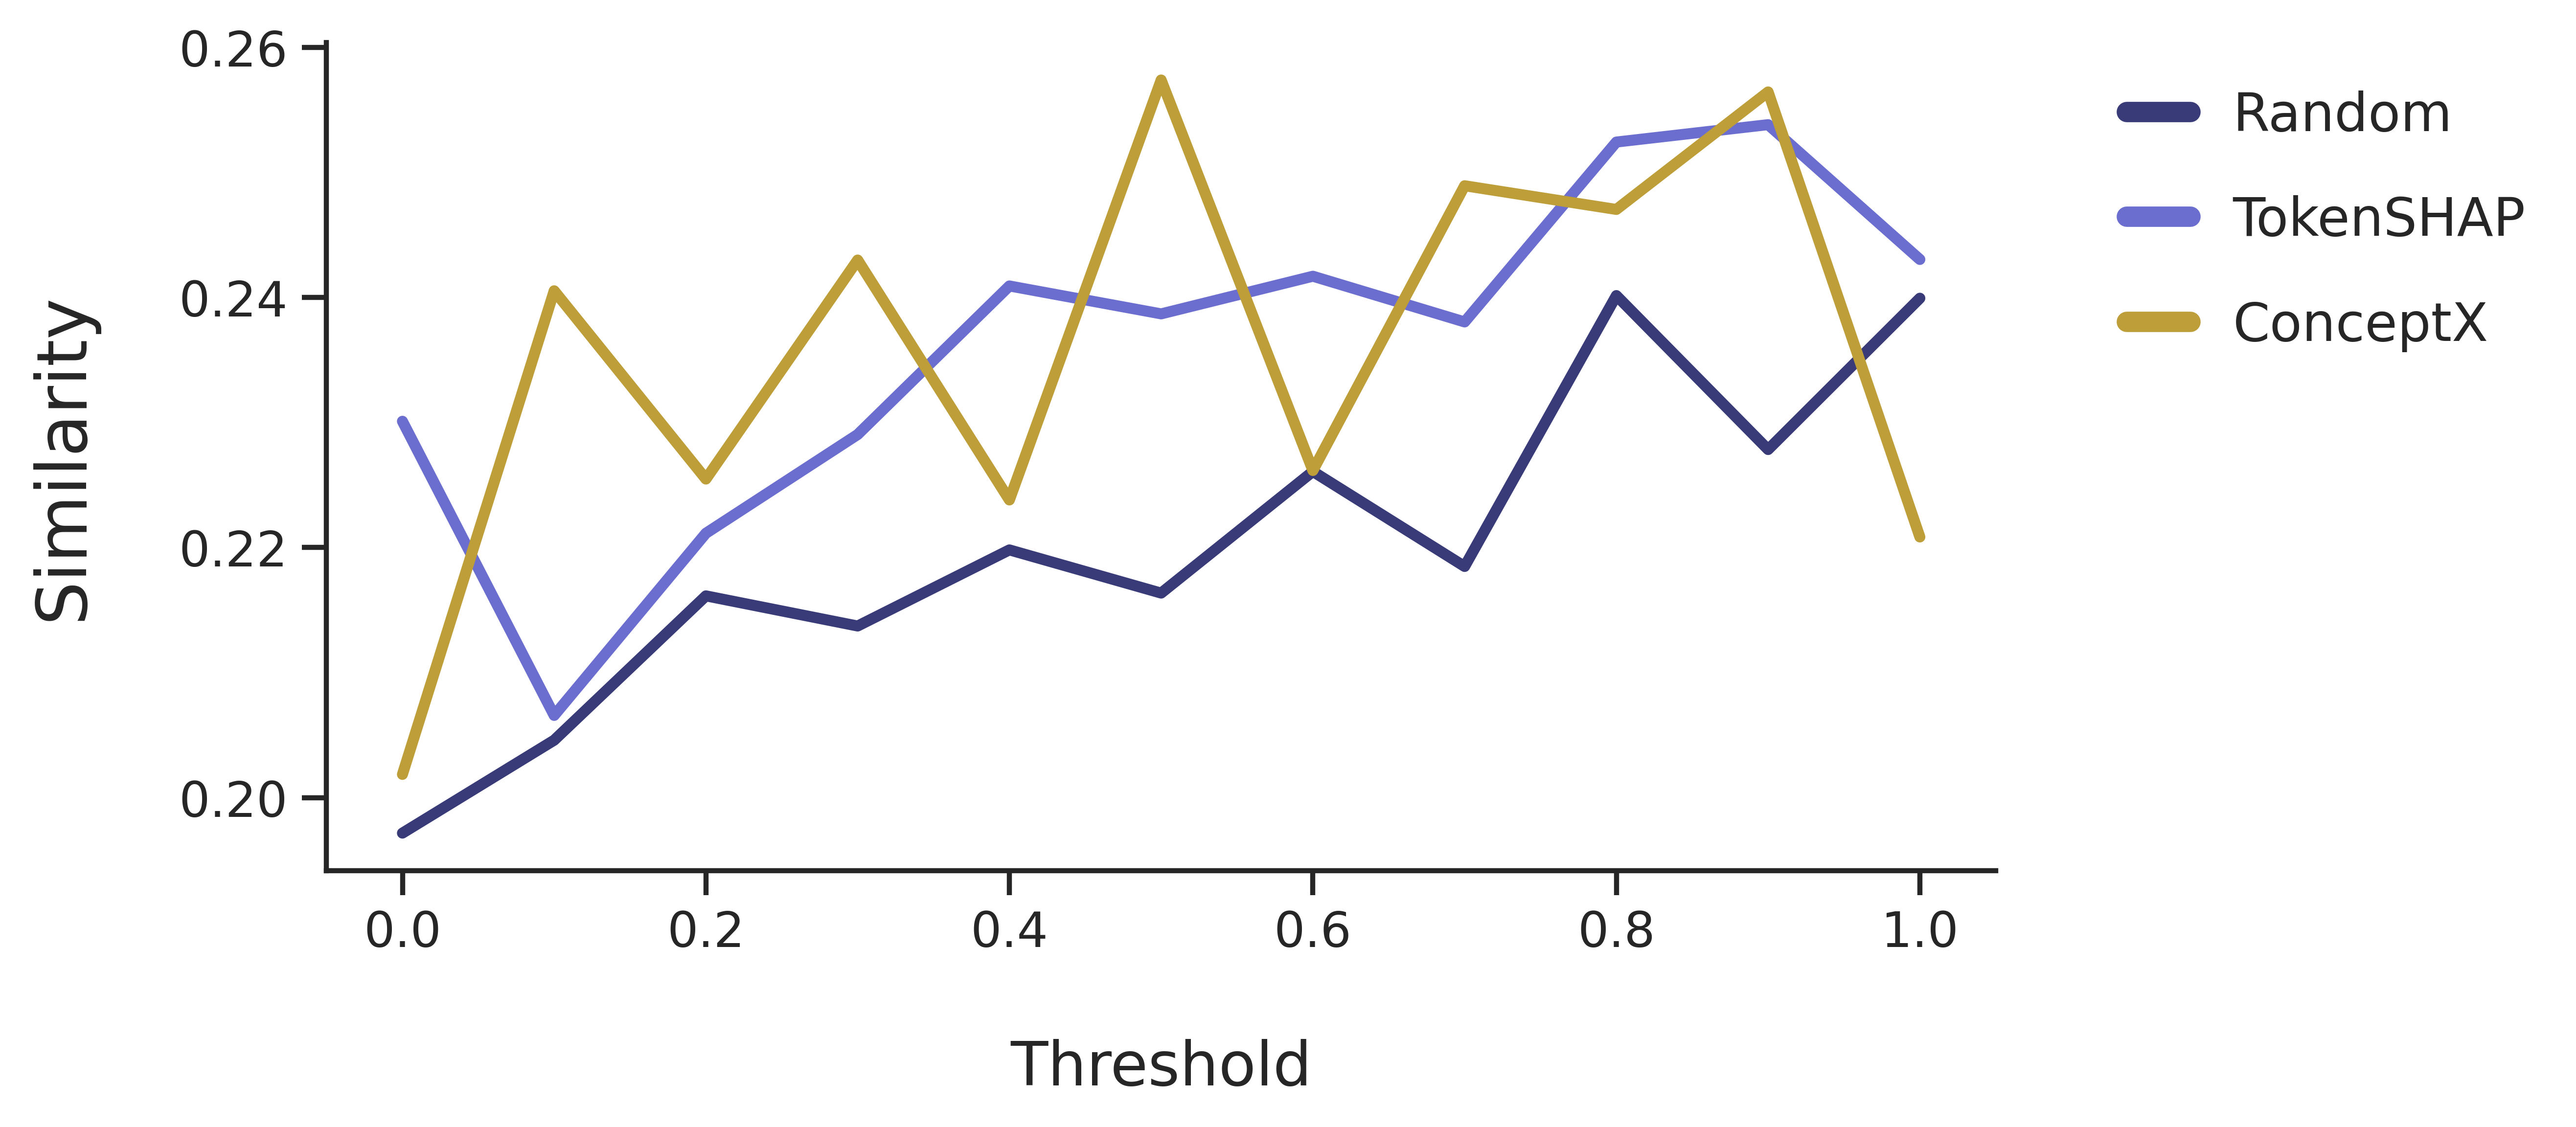

In [12]:
df = df_all


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
print(df[df["explainer"]=="ConceptX-R"])


# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "input", "explainer"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=2.7, errorbar=None
)

plt.xlabel('Threshold', fontsize=15, labelpad=20)  # Increase space between axis label and ticks
plt.ylabel('Similarity', fontsize=17, labelpad=20)  # Increase space between axis label and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
ordered_labels = [label for label in legend_order_alpaca]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=13, frameon=False,
    handlelength=1.2, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(5)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()